# COGS 108 - Final Project - SD Parks & Police Calls

# Overview

My project analyzes the relationship between San Diego Parks and San Diego Police calls for service. The data I used for my analysis was for the year 2020 and was obtained from the official San Diego government website. My goal was to quantify police calls for service and determine whether any adjustments need to be made to the operating hours of San Diego parks or to police patrols in the vicinity of parks to maximize safety. Ultimately, no significant relationship was found between the operating hours of San Diego parks and police calls for service, but parks located in the vicinity of beats with high call frequency should be assessed further.

# Name & GitHub ID

- Name: Randale Liwanag
- GitHub Username: randaleliwanag

# Research Question

What is the relationship between operating hours for San Diego Parks and the number of police calls for service? Is this relationship dependent on the time of day, day of the week, or month of the year?

## Background and Prior Work

The first thing I wanted to do was find out if there has been any kind of comparative research done regarding crime and city parks. I came across a research article published on the CDC's website that studied the relationship between crime and visits to parks in Greensboro, North Carolina. They measured all crimes and their vicinity to parks and homes. They also examined how these incidences affected park visits, duration of those visits, and park rating. What they found was that increased crime in parks and near homes were associated with fewer park visits. In other words, people are less likely to visit parks if they have a fear of being the victim of a crime.

In order to get a better understanding of how to relate the police calls for service to San Diego Parks, I thought it would be important to find out what the operating hours of the parks were. Additionally, I wanted to see if any changes to the San Diego Parks operating policies were adjusted throughout the year due to the COVID-19 pandemic. This may provide even more insight on the data. This information was obtained by the San Diego Parks website.

References (include links):
- 1) https://www.cdc.gov/pcd/issues/2020/19_0434.htm
- 2) https://www.sdparks.org/content/sdparks/en/AboutUs/Hours.html
- 3) https://www.sdparks.org/content/sdparks/en/news-events/news-stories/COVID-19Response.html

# Hypothesis


I hypothesize that more police calls for service happen during later hours in the day and outside of San Diego park operating hours. My assumption is that most crimes happen at night due to the criminals' ability to use darkness as concealment for their crimes. 

# Dataset(s)

- Dataset Name: Police Calls For Service 2020
- Link to the dataset: http://seshat.datasd.org/pd/pd_calls_for_service_2020_datasd.csv
- Number of observations: 522569 rows x 14 columns

This particular dataset logs each call to San Diego emergency services. Each incident includes an incident number, time and date, day of the week, address/cross streets, call type, disposition, beat, and priority.

# Setup

In [1]:
# Imports.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')

In [2]:
# Reading the data required for my analysis.
df_calls20 = pd.read_csv('pd_calls_for_service_2020_datasd.csv')
df_calls20

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,disposition,beat,priority
0,E20010000001,2020-01-01 00:00:09,4,400,NaN,06TH,AVE,NaN,NaN,NaN,11-8,A,523,0
1,E20010000002,2020-01-01 00:00:20,4,5000,NaN,UNIVERSITY,AVE,NaN,NaN,NaN,FD,K,826,2
2,E20010000003,2020-01-01 00:00:21,4,800,NaN,SAWTELLE,AVE,NaN,NaN,NaN,AU1,W,434,1
3,E20010000004,2020-01-01 00:00:32,4,5000,NaN,UNIVERSITY,AVE,NaN,NaN,NaN,FD,K,826,2
4,E20010000005,2020-01-01 00:00:42,4,5200,NaN,CLAIREMONT MESA,BLV,NaN,NaN,NaN,415V,K,111,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522564,E20120001602,2020-12-01 23:23:01,3,1200,NaN,K,ST,NaN,NaN,NaN,MPSSTP,K,521,2
522565,E20120001605,2020-12-01 23:28:18,3,5800,NaN,STREAMVIEW,DR,NaN,NaN,NaN,417,K,823,0
522566,E20120001608,2020-12-01 23:33:18,3,100,E,CALLE PRIMERA,NaN,NaN,NaN,NaN,T,K,712,2
522567,E20120001616,2020-12-01 23:48:27,3,100,NaN,06TH,AVE,NaN,NaN,NaN,SELENF,K,521,3


# Data Cleaning

Describe your data cleaning steps here.

In [3]:
# Dropping columns in the dataframe that are not needed for my analysis.
df_calls20 = df_calls20.drop(columns = ['address_number_primary', 'address_dir_primary', 'address_road_primary', 'address_sfx_primary', 'address_dir_intersecting', 'address_road_intersecting', 'address_sfx_intersecting', 'call_type', 'disposition'])

# Renaming the columns
df_calls20.columns = ['Incident #', 'Date and Time', 'Day of Week', 'Beat', 'Priority']

In [4]:
# Function to convert day from integer to string for easier readability and categorization.
def convert_day(int):

    if int == 1:
        output = 'Sunday'
    elif int == 2:
        output = 'Monday'
    elif int == 3:
        output = 'Tuesday'
    elif int == 4:
        output = 'Wednesday'
    elif int == 5:
        output = 'Thursday'
    elif int == 6:
        output ='Friday'
    elif int == 7:
        output = 'Saturday'
    else:
        output = np.nan

    return output

In [5]:
# Applying function to convert day from integer to string to dataframe.
df_calls20['Day of Week'] = df_calls20['Day of Week'].apply(convert_day)

In [6]:
# Function to convert month from numbers to name for easier readability and categorization.
def convert_month(string):

    if '2020-01' in string:
        output = 'January'
    elif '2020-02' in string:
        output = 'February'
    elif '2020-03' in string:
        output = 'March'
    elif '2020-04' in string:
        output = 'April'
    elif '2020-05' in string:
        output = 'May'
    elif '2020-06' in string:
        output = 'June'
    elif '2020-07' in string:
        output = 'July'
    elif '2020-08' in string:
        output = 'August'
    elif '2020-09' in string:
        output = 'September'
    elif '2020-10' in string:
        output = 'October'
    elif '2020-11' in string:
        output = 'November'
    elif '2020-12' in string:
        output = 'December'
    else:
        output = np.nan

    return output

In [7]:
# Applying function to convert month from numbers to name to dataframe and saving values to a new column named 'Month'.
df_calls20['Month'] = df_calls20['Date and Time'].apply(convert_month)

# Reordering columns
df_calls20 = df_calls20[['Incident #', 'Month', 'Date and Time', 'Day of Week', 'Beat', 'Priority']]

In [8]:
# Removing date, minutes, and seconds from the 'Time' column in order to show only hour and convert to integer.
df_calls20['Date and Time'] = df_calls20['Date and Time'].str[11:13]

# Renaming 'Date and Time' column to 'Hour' to reflect removal of date, minutes, and seconds from column.
df_calls20.columns = ['Incident #', 'Month', 'Hour', 'Day of Week', 'Beat', 'Priority']

In [9]:
# Functions to convert time to integer and classify open and closed hours to dataframes. Operating hours are dependent on month.
def five_close(time):
    # Format time into integer
    time = int(time)

    # Return state based on time
    if (time < 8) or (time > 16): 
        return 'Closed' 
    else:
        return 'Open'

    
def six_close(time):
    # Format time into integer
    time = int(time)

    # Return state based on time
    if (time < 8) or (time > 17): 
        return 'Closed' 
    else:
        return 'Open'


def seven_close(time):
    # Format time into integer
    time = int(time)

    # Return state based on time
    if (time < 8) or (time > 18): 
        return 'Closed' 
    else:
        return 'Open'
    

def eight_close(time):
    # Format time into integer
    time = int(time)

    # Return state based on time
    if (time < 8) or (time > 19): 
        return 'Closed' 
    else:
        return 'Open'

In [10]:
# Applying function to convert time to integer and classify open and closed hours to dataframes for each month.
df_calls20.loc[df_calls20['Month'] == 'January', 'Park Status'] = df_calls20.loc[df_calls20['Month'] == 'January', 'Hour'].apply(five_close)

df_calls20.loc[df_calls20['Month'] == 'February', 'Park Status'] = df_calls20.loc[df_calls20['Month'] == 'February', 'Hour'].apply(six_close)

df_calls20.loc[df_calls20['Month'] == 'March', 'Park Status'] = df_calls20.loc[df_calls20['Month'] == 'March', 'Hour'].apply(seven_close)

df_calls20.loc[df_calls20['Month'] == 'April', 'Park Status'] = df_calls20.loc[df_calls20['Month'] == 'April', 'Hour'].apply(eight_close)

df_calls20.loc[df_calls20['Month'] == 'May', 'Park Status'] = df_calls20.loc[df_calls20['Month'] == 'May', 'Hour'].apply(eight_close)

df_calls20.loc[df_calls20['Month'] == 'June', 'Park Status'] = df_calls20.loc[df_calls20['Month'] == 'June', 'Hour'].apply(eight_close)

df_calls20.loc[df_calls20['Month'] == 'July', 'Park Status'] = df_calls20.loc[df_calls20['Month'] == 'July', 'Hour'].apply(eight_close)

df_calls20.loc[df_calls20['Month'] == 'August', 'Park Status'] = df_calls20.loc[df_calls20['Month'] == 'August', 'Hour'].apply(eight_close)

df_calls20.loc[df_calls20['Month'] == 'September', 'Park Status'] = df_calls20.loc[df_calls20['Month'] == 'September', 'Hour'].apply(seven_close)

df_calls20.loc[df_calls20['Month'] == 'October', 'Park Status'] = df_calls20.loc[df_calls20['Month'] == 'October', 'Hour'].apply(seven_close)

df_calls20.loc[df_calls20['Month'] == 'November', 'Park Status'] = df_calls20.loc[df_calls20['Month'] == 'November', 'Hour'].apply(six_close)

df_calls20.loc[df_calls20['Month'] == 'December', 'Park Status'] = df_calls20.loc[df_calls20['Month'] == 'December', 'Hour'].apply(five_close)

In [11]:
# Dropping values for the month of December due to incomplete data for the month.
df_calls20 = df_calls20[~df_calls20['Month'].isin(['December'])]

In [12]:
df_calls20

,Incident #,Month,Hour,Day of Week,Beat,Priority,Park Status
0,E20010000001,January,00,Wednesday,523,0,Closed
1,E20010000002,January,00,Wednesday,826,2,Closed
2,E20010000003,January,00,Wednesday,434,1,Closed
3,E20010000004,January,00,Wednesday,826,2,Closed
4,E20010000005,January,00,Wednesday,111,1,Closed
...,...,...,...,...,...,...,...
521151,E20110047691,November,23,Monday,541,2,Closed
521152,E20110047692,November,23,Monday,312,1,Closed
521153,E20110047693,November,23,Monday,511,2,Closed
521154,E20110047694,November,23,Monday,826,2,Closed


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

Text(0.5, 0, 'Count')

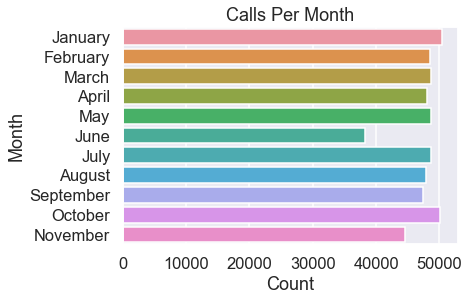

In [13]:
# Plotting the total number of calls per month.
sns.countplot(y = 'Month', data = df_calls20).set_title('Calls Per Month')
plt.xlabel('Count')

In [14]:
#Counting the number of calls per month.

df_calls20['Month'].value_counts()

January      50364
October      50136
March        48690
May          48670
July         48601
February     48497
April        47985
August       47860
September    47480
November     44593
June         38280
Name: Month, dtype: int64

Text(0.5, 0, 'Count')

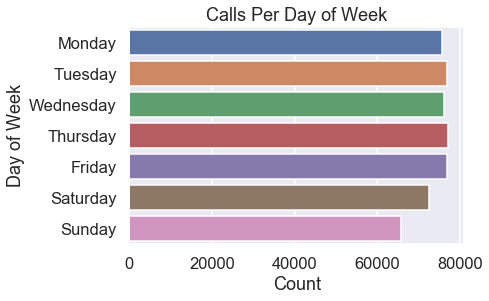

In [15]:
# Plotting the total number of calls per day of the week.
sns.countplot(y = 'Day of Week', data = df_calls20, order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).set_title('Calls Per Day of Week')
plt.xlabel('Count')

In [16]:
#Counting the number of calls per day of the week.

df_calls20['Day of Week'].value_counts()

Thursday     77149
Friday       76980
Tuesday      76913
Wednesday    76093
Monday       75646
Saturday     72614
Sunday       65761
Name: Day of Week, dtype: int64

Text(0, 0.5, 'Count')

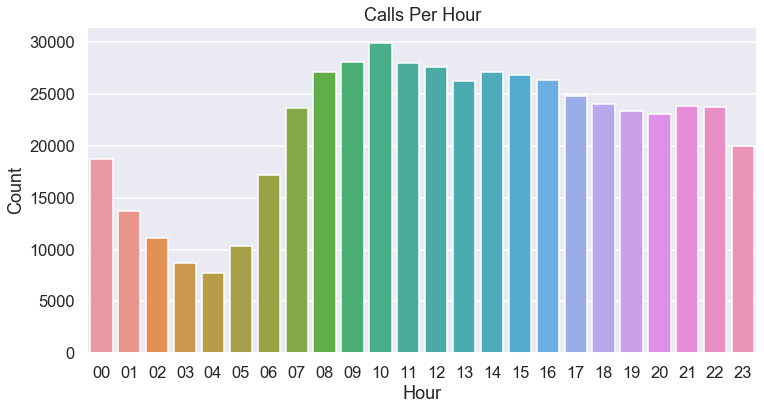

In [17]:
# Plotting the total number of calls per hour.
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Hour', data = df_calls20).set_title('Calls Per Hour')
plt.ylabel('Count')

In [18]:
#Counting the number of calls per hour.

df_calls20['Hour'].value_counts()

10    29927
09    28031
11    27995
12    27615
08    27094
14    27086
15    26793
16    26361
13    26271
17    24811
18    24034
21    23793
22    23764
07    23641
19    23333
20    23031
23    19982
00    18696
06    17194
01    13754
02    11068
05    10385
03     8742
04     7755
Name: Hour, dtype: int64

Text(0, 0.5, 'Count')

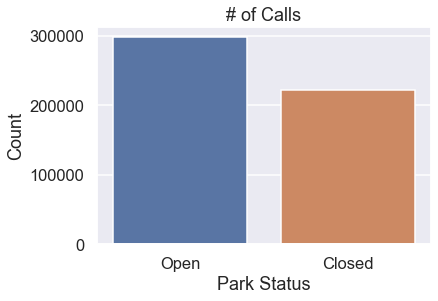

In [19]:
# Plotting the total number of calls when parks are open versus closed.
sns.countplot(x = 'Park Status', data = df_calls20, order = ['Open', 'Closed']).set_title('# of Calls')
plt.ylabel('Count')

In [20]:
#Counting the number of incidents by operating status.

df_calls20['Park Status'].value_counts()

Open      298297
Closed    222859
Name: Park Status, dtype: int64

Text(0, 0.5, 'Count')

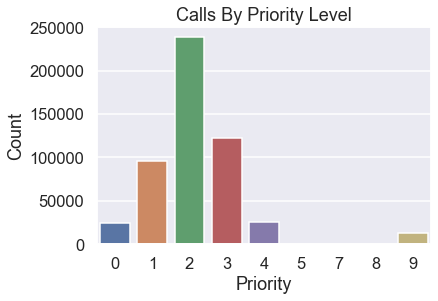

In [21]:
# Plotting the total number of calls by priority level.
sns.countplot(df_calls20['Priority']).set_title('Calls By Priority Level')
plt.ylabel('Count')

In [22]:
#Counting the number of incidents by priority level.

df_calls20['Priority'].value_counts()

2    238439
3    122809
1     96377
4     25374
0     25016
9     13135
5         4
8         1
7         1
Name: Priority, dtype: int64

Text(0, 0.5, 'Count')

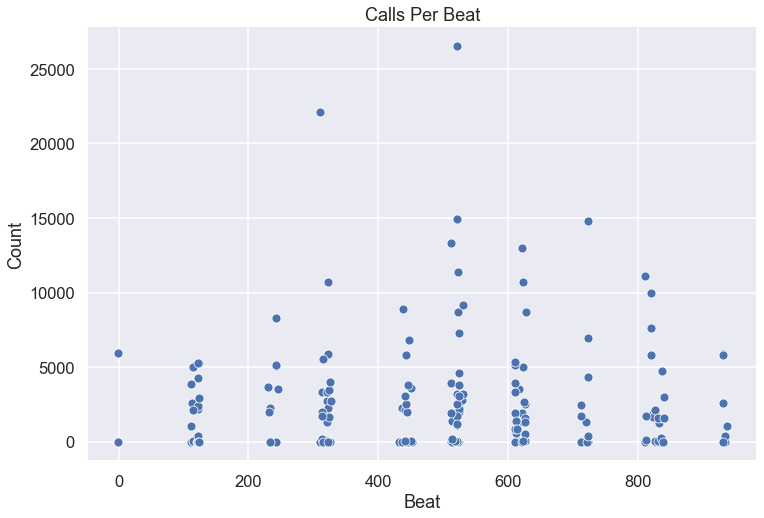

In [23]:
# Plotting the total number of calls per beat.
plt.figure(figsize = (12, 8))
sns.scatterplot(x = df_calls20['Beat'], y = df_calls20['Beat'].value_counts()).set_title('Calls Per Beat')
plt.ylabel('Count')

In [24]:
df_calls20['Beat'].value_counts()

521    26527
122    22104
611    14952
813    14783
627    13314
       ...  
144        1
301        1
147        1
150        1
0          1
Name: Beat, Length: 245, dtype: int64

# Ethics & Privacy

Although the data used in this project was provided for me, police calls for service are public record and is available for use on the official San Diego government website. No identifiable information such as names, exact addresses, phone numbers, etc. were included in these records so there was no need to remove any data from it prior to its use.

It is important to note that the data used for this analysis was for the year 2020 and the information for December was incomplete due to the data being obtained in early December.  This is why I found it necessary to not included December in my data analysis because of the potential for it to skew the rest of the data. Additionally, the data for 2020 may be unique to other years due to the circumstances surrounding the COVID-19 pandemic. It may not be wise to include this data when trying to analyze multiple years. Also, this data was solely about the city of San Diego, California, so these findings may not carry over to other cities and/or states.

# Conclusion & Discussion

Based on my analysis, there does not seem to be a relationship between police calls for service and the operating hours of the San Diego Parks and it is not significantly dependent on day of the week or month of the year. When analyzing the total calls per month, it seems as though they did not differ signicantly. June was extremely low, but I was not able to find an underlying reason for this. In terms of total of calls per day of the week, all weekdays seemed to be relatively similar. Saturday was slightly less, with Sunday being the lowest. This could be due to the fact that Sunday is the day before the start of the work/school week. I was incorrect in my hypothesis that more calls for service would happen at night due to the concealment of darkness. In fact, the peak calls for service happened in the morning and early afternoon. Calls for service slowly tapers down after around 4PM and are at their lowest in the early hours of the morning. More calls happened when parks were open versus closed, but this could be due to more people being active in the day in general. Most call priority levels were at 2, which makes sense because calls to police are generally for matters that people consider urgent. It would be wise for the city of San Diego to consider increasing police patrols and/or assessing operating hours of the parks in the vicinity of the beats with high calls for service. Considering the findings of the research publication on the CDC website mentioned earlier in my project, this can have a negative impact on the usage of the parks in those areas. 